Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Analyze the head of the datasets

In [2]:
gender = pd.read_csv('gender_submission.csv')
gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [3]:
train_data = pd.read_csv('train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data = pd.read_csv('test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# Count of total survivors 
survival_count_train = train_data.groupby('Sex')['Survived'].sum()
survival_count_train

Sex
female    233
male      109
Name: Survived, dtype: int64

In [6]:
# Encoding the 'Sex' column: Male = 1, Female = 0
train_data['Sex_Encoded'] = train_data['Sex'].apply(lambda x: 1 if x == 'male' else 0)
test_data['Sex_Encoded'] = test_data['Sex'].apply(lambda x: 1 if x == 'male' else 0)

Checking the missing values

In [7]:
train_missing_values = train_data.isnull().sum()
test_missing_values = test_data.isnull().sum()

train_missing_values, test_missing_values

(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 Sex_Encoded      0
 dtype: int64,
 PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age             86
 SibSp            0
 Parch            0
 Ticket           0
 Fare             1
 Cabin          327
 Embarked         0
 Sex_Encoded      0
 dtype: int64)

In [8]:
# Imputing missing values in 'Age' using the median, as it is often a good choice for numerical features with missing values
train_data['Age_final'] = train_data['Age'].fillna(train_data['Age'].median())
test_data['Age_final'] = test_data['Age'].fillna(test_data['Age'].median())

In [9]:
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())

In [10]:
train_encoded = pd.get_dummies(train_data, columns=['Embarked'], drop_first=True)
test_encoded  = pd.get_dummies(test_data, columns=['Embarked'], drop_first=True)

In [11]:
# Samakan kolom train dan test (kadang dummy-nya beda)
missing_cols_in_test = set(train_encoded.columns) - set(test_encoded.columns)
for col in missing_cols_in_test:
    if col != 'Survived':      # jangan tambahkan target ke test
        test_encoded[col] = 0

<Axes: xlabel='Sex', ylabel='Survived'>

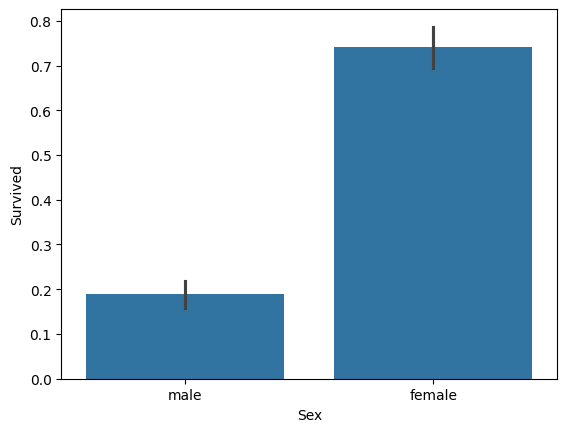

In [26]:
# Survival by Sex
sns.barplot(x='Sex', y='Survived', data=train_data)

<Axes: xlabel='Pclass', ylabel='Survived'>

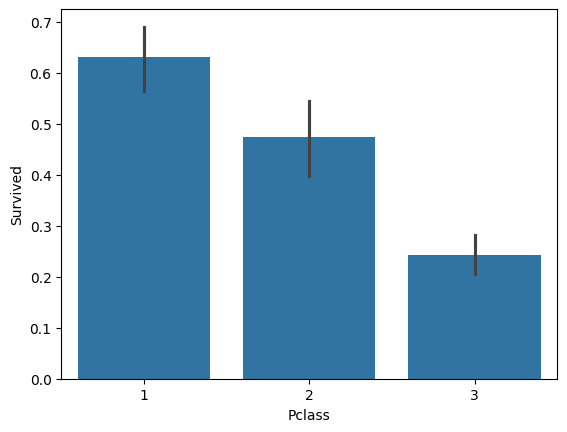

In [27]:
# Survival by Pclass
sns.barplot(x='Pclass', y='Survived', data=train_data)

<Axes: xlabel='Age', ylabel='Count'>

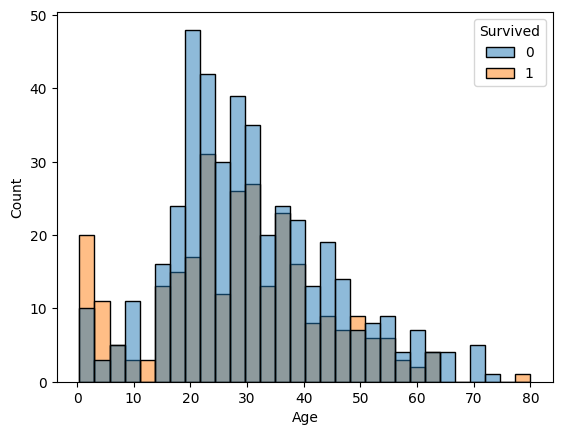

In [28]:
# Survival by Age distribution
sns.histplot(data=train_data, x='Age', hue='Survived', bins=30)

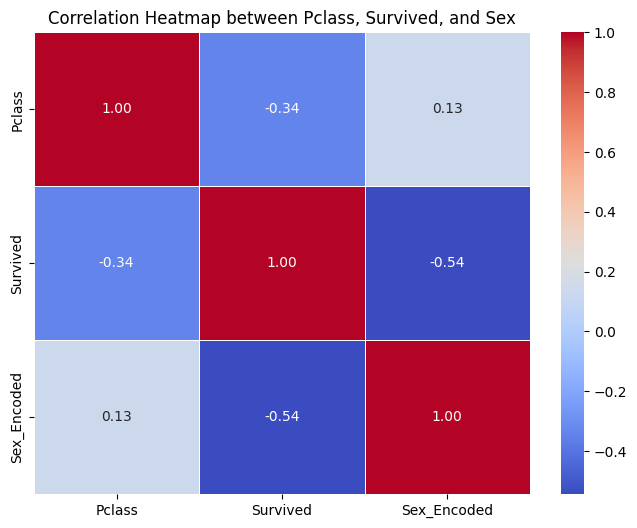

In [12]:
# Creating a heatmap to show the relationship between Pclass, Survived, and Sex
plt.figure(figsize=(8, 6))
heatmap_data = train_data[['Pclass', 'Survived', 'Sex_Encoded']].corr()

sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)
plt.title('Correlation Heatmap between Pclass, Survived, and Sex')
plt.show()

Train

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [14]:
# Fitur yang dipakai
feature_cols = [
    'Pclass',
    'Sex_Encoded',
    'Age_final',
    'SibSp',
    'Parch',
    'Fare',
] + [col for col in train_encoded.columns if col.startswith('Embarked_')]

In [15]:
X = train_encoded[feature_cols]
y = train_encoded['Survived']

In [16]:
# Split train/validation
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [17]:
# Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [18]:
# Evaluasi di validation set
print("Validation accuracy:", accuracy_score(y_val, model.predict(X_val)))
print(classification_report(y_val,model.predict(X_val)))

Validation accuracy: 0.8044692737430168
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



In [21]:
# Pastikan X_train dan X_test terdefinisi pakai feature_cols yang sama
X_train = train_encoded[feature_cols]
X_test  = test_encoded[feature_cols]

test_pred = model.predict(X_test)

submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': test_pred
})
submission.to_csv('submission_logreg.csv', index=False)
print("Saved to submission_logreg.csv")

Saved to submission_logreg.csv


Confusion Matrix

In [22]:
from sklearn.metrics import confusion_matrix

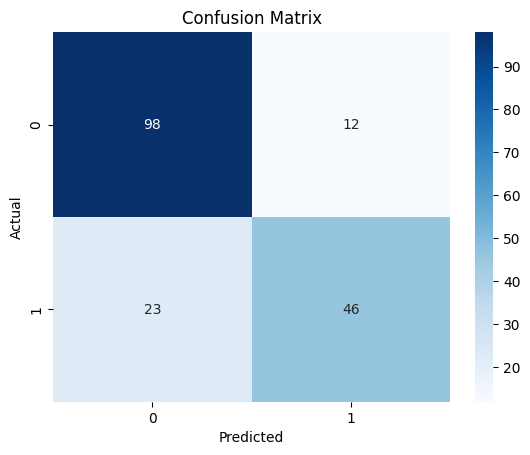

In [23]:
cm = confusion_matrix(y_val, model.predict(X_val))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [24]:
importance = pd.DataFrame({
    'feature': feature_cols,
    'coef': model.coef_[0]
}).sort_values(by='coef', ascending=False)

importance


,feature,coef
6,Embarked_Q,0.267198
5,Fare,0.002193
2,Age_final,-0.038646
4,Parch,-0.069840
3,SibSp,-0.244209
7,Embarked_S,-0.396988
0,Pclass,-1.090931
1,Sex_Encoded,-2.556507
